# **Capstone Project Module 2: SaaS Sales Data Analysis**

## 1. Introduction and Business Problem

### A. Project Background

This project serves as a comprehensive data analysis for a **fictitious B2B SaaS company** specializing in sales and marketing software. As a **Data Analyst**, the goal is to leverage transactional data to provide actionable, data-driven insights to company stakeholders.

### B. Problem Statement

The company seeks to **maximize profitability and optimize its sales strategy** by gaining a deeper understanding of its operational performance. The core problem is to identify which customer segments, products, and geographical regions are driving sales and profit, and to quantify the impact of pricing decisions (like discounts) on the bottom line.

### C. Business Questions

To address the problem statement, this analysis will answer the following key questions:

1.  **Profitability & Segment Analysis:** Which `Customer Segments` (SMB, Strategic, Enterprise) are the most profitable, and how does this profitability compare across `Regions` (AMER, EMEA, APAC)?
2.  **Product Performance:** Which `Product` categories generate the highest revenue and quantity sold, and are these top-selling products also the most profitable?
3.  **Pricing Strategy & Hypothesis Testing:** **Is there a statistically significant difference** in the `average Profit` when a customer is given a `Discount` versus when they are not? (This question will be addressed using a statistical test).

### D. Data Dictionary

The analysis uses the `SaaS-Sales.csv` file, which contains transactional data which can be accessed [here](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales). Key columns include:

| Column Name | Description |
| :--- | :--- |
| **Row ID** | Unique ID for each transaction row. |
| **Order ID** | Unique ID for each order (one order may include multiple products). |
| **Order Date** | Date when the transaction occurred. |
| **Date Key** | Numeric representation of the transaction date. |
| **Contact Name** | Customer contact person’s name. |
| **Country, City** | Geographical location of the customer. |
| **Region, Subregion** | Regional groupings for geographical analysis. |
| **Customer** | Company name of the customer. |
| **Customer ID** | Unique ID for the customer. |
| **Industry** | Customer’s industry. |
| **Segment** | Customer segment (e.g., Enterprise, SMB, Strategic). |
| **Product** | SaaS product sold. |
| **License** | Product license number sold. |
| **Sales** | Total sales value (USD). |
| **Quantity** | Number of units/licenses sold. |
| **Discount** | Discount rate applied. |
| **Profit** | Profit generated from the transaction (USD). |

## 2. Data Preparation and Cleaning

### A. Import Libraries
The first step in any data project is importing the necessary Python libraries. We import **pandas** and **numpy** for data manipulation and calculation, **matplotlib.pyplot** and **seaborn** for visualization, and **scipy.stats** to support the statistical hypothesis testing required later in the analysis.

In [46]:
# Data manipulation and cleaning
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# Statistical analysis
from scipy import stats
from scipy.stats import shapiro, ttest_ind, mannwhitneyu

### B. Load Data
We load the `SaaS-Sales.csv` dataset into a pandas DataFrame named `df`. This is the core transactional data containing all the sales, profit, product, and customer information necessary to answer the business questions.

In [22]:
# Load dataset
df = pd.read_csv("SaaS-Sales.csv")

# Display top 5 rows
display(df.head())

# Display bottom 5 rows
display(df.tail())

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164


,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.248,3,0.2,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.960,2,0.0,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.576,2,0.2,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.600,4,0.0,13.3200
9993,9994,AMER-2023-119914,5/5/2023,20230505,Jasmine Springer,United States,Dallas,AMER,NAMER,Comcast,1022,Communications,SMB,OneView,3NTBV9B3PS,243.160,2,0.0,72.9480


### C. Initial Data Inspection
Before diving into the analysis, we first need to understand our dataset through a **data understanding** phase.  
From this process, we will identify any anomalies present in the dataset that need to be addressed during the **data cleaning** stage.    

As the first step, let’s examine the general information of the `SaaS-Sales` dataset.

In [23]:
# Check data types and identify missing values
df.info()
print(f'\nThe number of rows and columns in the dataset df is {df.shape}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

The dataset contains **9,994** entries and **19 columns**. The initial check revealed:

* **Missing Values:** There are **no missing values** across any columns, simplifying the cleaning process.
* **Duplicates:** There are **0 duplicated rows**, indicating high data integrity in terms of unique transactions.
* **Data Types:** The `Order Date` column is of `object` type and requires conversion to `datetime` for time-series analysis.

In [24]:
# Summary statistics for numerical columns
display(df.describe(), df.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Order Date,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,1237,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,9/6/2022,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,38,37,2001,922,4219,2507,192,2127,5191,1842,1


The two tables above summarize the dataset by column type:

1. **Numerical Columns (df.describe())**  
   - Provide statistical measures such as count, mean, standard deviation, min, max, and quartiles.  
   - Useful for identifying skewed distributions, outliers, and the range of key metrics (e.g., `Sales`, `Profit`, `Quantity`, `Discount`).  

2. **Categorical Columns (df.describe(include='object'))**  
   - Provide information such as count, number of unique categories, most frequent value (`top`), and its frequency (`freq`).  
   - This helps us understand the diversity of categories in fields such as `Country`, `Customer`, `Product`, `Segment`, and `Industry`.  
   - For example, we can quickly see which product or customer appears most frequently, and whether some categories dominate the dataset.  

Together, these summaries give us both a **quantitative** and **qualitative** overview of the dataset, which will guide the cleaning and analysis steps that follow.

In [25]:
# Set column width display to unlimited
pd.set_option('display.max_colwidth', None)

# Collect unique value information
listItem = []
for col in df.columns:
    uniques = df[col].unique()
    sample_values = uniques[:10]  # show only first 10 unique values
    listItem.append([col, df[col].nunique(), sample_values])

# Create summary dataframe
tabel1Desc = pd.DataFrame(
    columns=['Column Name', 'Number of Unique', 'Unique Sample'],
    data=listItem
)

tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Row ID,9994,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]"
1,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336]"
2,Order Date,1237,"[11/9/2022, 6/13/2022, 10/11/2021, 6/9/2020, 4/16/2023, 12/6/2022, 11/22/2021, 11/11/2020, 5/13/2020, 8/27/2020]"
3,Date Key,1237,"[20221109, 20220613, 20211011, 20200609, 20230416, 20221206, 20211122, 20201111, 20200513, 20200827]"
4,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes]"
5,Country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France]"
6,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San José]"
7,Region,3,"[EMEA, AMER, APJ]"
8,Subregion,12,"[UKIR, NAMER, EU-WEST, NOR, JAPN, EU, MEA, LATAM, ANZ, APAC]"
9,Customer,99,"[Chevron, Phillips 66, Royal Dutch Shell, BNP Paribas, Engie, Microsoft, Pfizer, Toyota Motor, Home Depot, Wells Fargo]"


Based on the results of the *data understanding* stage, several important cleaning and preparation steps are required before analysis:  

1. **Date Conversion**  
   - The column `Order Date` is currently stored as an object (string).  
   - This column will be converted into a proper datetime format so that we can perform time-series analysis (monthly, quarterly, yearly).  
   - The column `Date Key` is redundant since it represents the same information and will be dropped.  

2. **Redundant Identifiers**  
   - Both `Customer` and `Customer ID` represent customer identity.  
   - For analysis, we will keep `Customer ID` as the unique identifier, while `Customer` will still be used for reporting or dashboard visuals.  

3. **Profit Margin Calculation**  
   - A new derived column `Profit Margin` will be created.
   - This will help us evaluate the efficiency of sales across products, customers, and regions.  

4. **Negative Profit Flagging**  
   - Instead of removing them, we will add a flag column `LossFlag` (1 if Profit < 0, otherwise 0).  
   - This will allow us to analyze and compare loss-making transactions versus profitable ones.  

These cleaning steps ensure that the dataset is ready for further exploratory data analysis (EDA) and statistical tests.

In [26]:
# 1. Convert Order Date to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m/%d/%Y')

# 2. Drop redundant Date Key
df = df.drop(columns=['Date Key'])

# 3. Keep Customer and Customer ID (no action needed yet)

# 4. Create Profit Margin column (handle division by zero just in case)
df['Profit Margin'] = np.where(df['Sales'] > 0,
                               df['Profit'] / df['Sales'],
                               0)

# 5. Create LossFlag column
df['LossFlag'] = np.where(df['Profit'] < 0, 1, 0)

# Quick check
df[['Sales', 'Profit', 'Profit Margin', 'LossFlag']].head()

,Sales,Profit,Profit Margin,LossFlag
0,261.9600,41.9136,0.1600,0
1,731.9400,219.5820,0.3000,0
2,14.6200,6.8714,0.4700,0
3,957.5775,-383.0310,-0.4000,1
4,22.3680,2.5164,0.1125,0


1. **Convert Order Date to datetime**  
   - Enables proper time-based analysis (monthly, quarterly, yearly).  

2. **Drop Date Key**  
   - This column is redundant and no longer needed.  

3. **Keep both Customer and Customer ID**  
   - Both are retained for now: Customer ID will be used as a unique identifier in analysis, while |Customer remains useful for reporting.  

4. **Create Profit Margin column**  
   - Calculated as `Profit / Sales`.  
   - Division by zero is handled by replacing the margin with 0 when sales equal zero.  

5. **Create LossFlag column**  
   - A binary flag indicating whether a transaction is loss-making (1 if Profit < 0, otherwise 0).  
   - This allows easy filtering and comparison of loss vs. profitable transactions.  

These transformations prepare the dataset for the next phase.

**Note**: As for **Missing Values** & **Duplicate Rows**, we concluded that they are non-existent, so no further action is required.


## 3. Data Analysis

### A. Profitability & Segment Analysis  

**Objective.**  
Identify which **customer segments** (SMB, Strategic, Enterprise) are most profitable, and analyze how their profitability compares across **regions** (AMER, EMEA, APJ).  

**Approach.**  
1. Aggregate the dataset by `Segment` and `Region`.  
2. Compute key metrics:  
   - `Total_Sales`  
   - `Total_Profit`  
   - `Transactions` (number of records)  
   - `Loss_Transactions` (count of loss-making deals)  
   - `Profit_Margin` = Total Profit / Total Sales  
   - `Avg_Profit_per_Transaction` = Total Profit / Transactions  
   - `Loss_Ratio` = Loss Transactions / Total Transactions  
3. Create pivot tables to support visualizations.  
4. Visualize results with:  
   - Heatmap of Profit Margin across Segment × Region.  
   - Bar plots of Total Profit and Loss Ratio per Segment in each Region.  
5. Summarize overall performance by Segment (across all regions).  

In [58]:
# 1) Aggregate metrics by Segment and Region
seg_reg = df.groupby(['Segment', 'Region']).agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Transactions=('Profit', 'count'),
    Loss_Transactions=('LossFlag', 'sum')
).reset_index()

seg_reg['Profit_Margin'] = np.where(seg_reg['Total_Sales'] > 0,
                                    seg_reg['Total_Profit'] / seg_reg['Total_Sales'],
                                    np.nan)
seg_reg['Avg_Profit_per_Transaction'] = seg_reg['Total_Profit'] / seg_reg['Transactions']
seg_reg['Loss_Ratio'] = seg_reg['Loss_Transactions'] / seg_reg['Transactions']

# Display the table (sorted by Total_Profit)
display(seg_reg.sort_values(by='Total_Profit', ascending=False))

,Segment,Region,Total_Sales,Total_Profit,Transactions,Loss_Transactions,Profit_Margin,Avg_Profit_per_Transaction,Loss_Ratio
5,SMB,EMEA,527232.7870,74958.7558,2180,351,0.142174,34.384750,0.161009
3,SMB,AMER,423965.9390,64474.8817,1918,224,0.152076,33.615684,0.116788
6,Strategic,AMER,268690.6545,39874.1066,1093,124,0.148402,36.481342,0.113449
8,Strategic,EMEA,299069.2365,39486.8017,1295,232,0.132032,30.491739,0.179151
2,Enterprise,EMEA,217584.9915,33010.4875,744,119,0.151713,44.368935,0.159946
0,Enterprise,AMER,145193.0110,23078.0015,654,70,0.158947,35.287464,0.107034
7,Strategic,APJ,138386.4758,12618.2257,632,200,0.091181,19.965547,0.316456
1,Enterprise,APJ,66875.1460,4210.1895,385,123,0.062956,10.935557,0.319481
4,SMB,APJ,210202.6190,-5314.4283,1093,428,-0.025282,-4.862240,0.391583


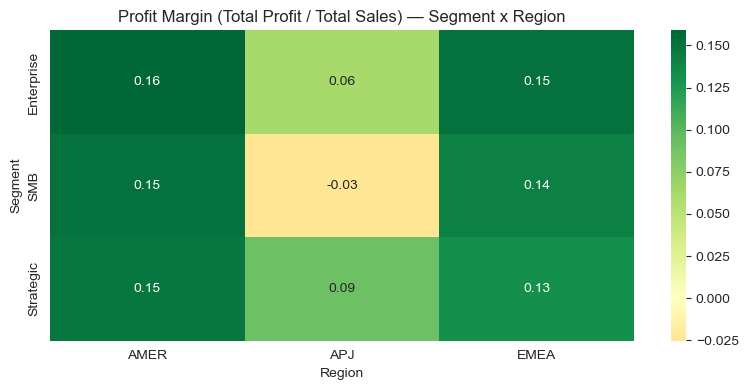

C:\Users\cakra\AppData\Local\Temp\ipykernel_31908\1221833206.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Profit', y='Segment', data=subset, palette='viridis')


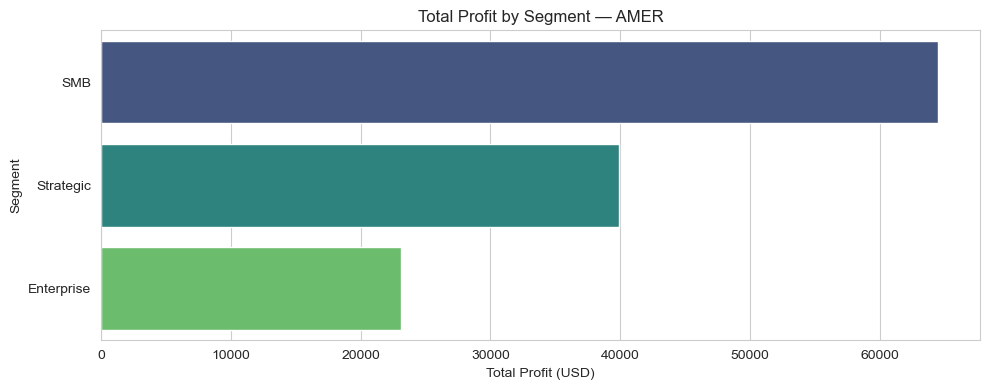

C:\Users\cakra\AppData\Local\Temp\ipykernel_31908\1221833206.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loss_Ratio', y='Segment', data=subset, palette='coolwarm')


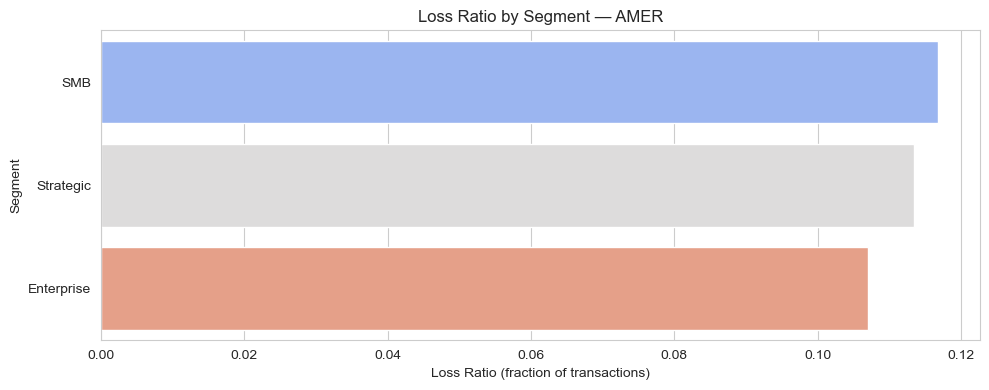

C:\Users\cakra\AppData\Local\Temp\ipykernel_31908\1221833206.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Profit', y='Segment', data=subset, palette='viridis')


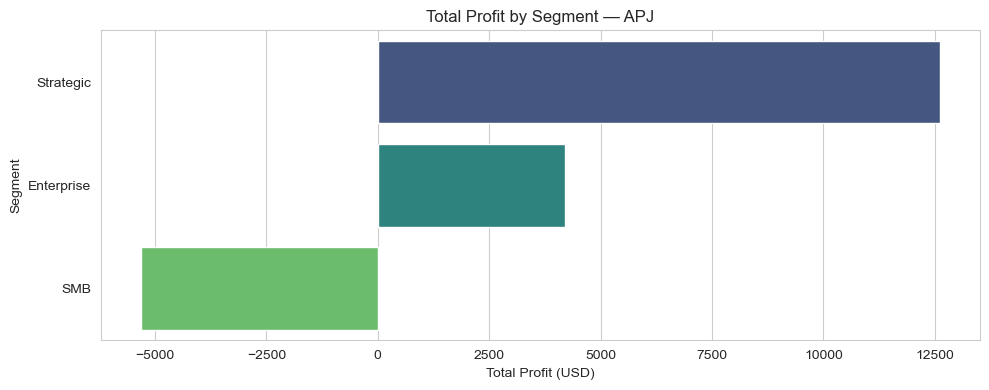

C:\Users\cakra\AppData\Local\Temp\ipykernel_31908\1221833206.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loss_Ratio', y='Segment', data=subset, palette='coolwarm')


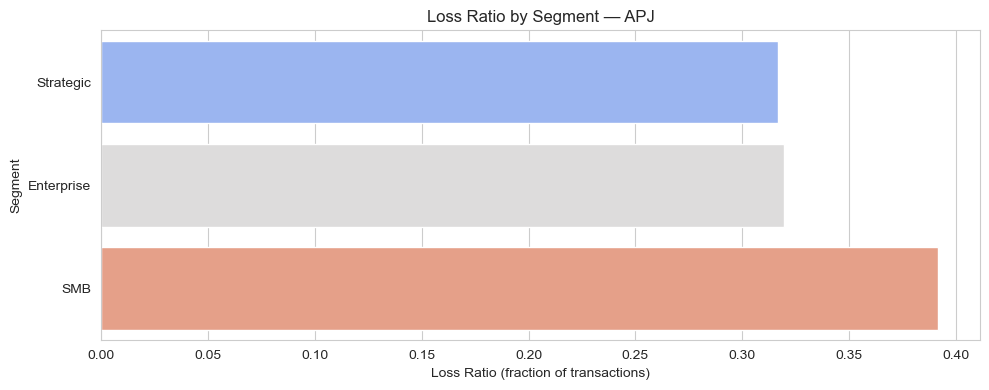

C:\Users\cakra\AppData\Local\Temp\ipykernel_31908\1221833206.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Profit', y='Segment', data=subset, palette='viridis')


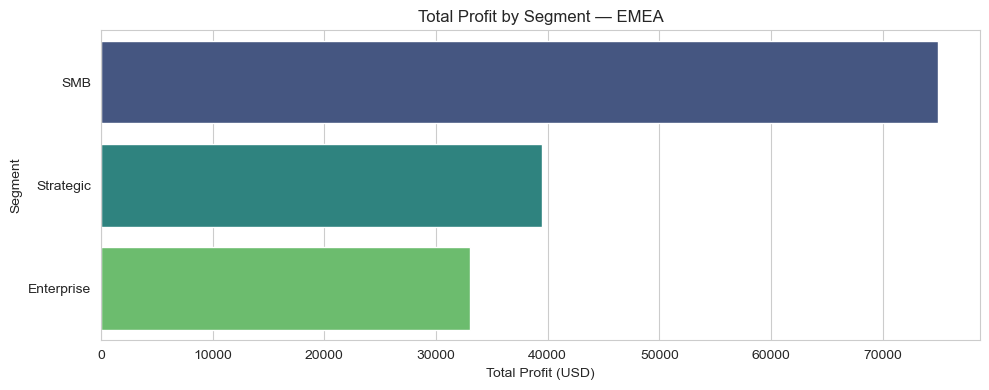

C:\Users\cakra\AppData\Local\Temp\ipykernel_31908\1221833206.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Loss_Ratio', y='Segment', data=subset, palette='coolwarm')


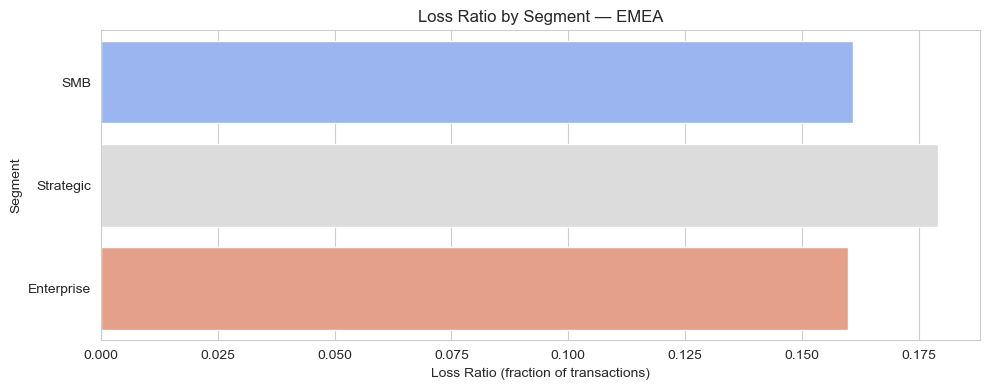

In [59]:
# 2) Pivot tables for heatmap / plots
pivot_margin = seg_reg.pivot(index='Segment', columns='Region', values='Profit_Margin')
pivot_profit = seg_reg.pivot(index='Segment', columns='Region', values='Total_Profit')
pivot_loss = seg_reg.pivot(index='Segment', columns='Region', values='Loss_Ratio')
pivot_tx = seg_reg.pivot(index='Segment', columns='Region', values='Transactions')

# 3) Heatmap: Profit Margin by Segment × Region
plt.figure(figsize=(8,4))
sns.heatmap(pivot_margin, annot=True, fmt=".2f", cmap='RdYlGn', center=0)
plt.title("Profit Margin (Total Profit / Total Sales) — Segment x Region")
plt.xlabel("Region")
plt.ylabel("Segment")
plt.tight_layout()
plt.show()

# 4) Bar plots: Total Profit and Loss Ratio by Segment within each Region
regions = seg_reg['Region'].unique()
for r in regions:
    subset = seg_reg[seg_reg['Region'] == r].sort_values('Total_Profit', ascending=False)
    plt.figure(figsize=(10,4))
    sns.barplot(x='Total_Profit', y='Segment', data=subset, palette='viridis')
    plt.title(f"Total Profit by Segment — {r}")
    plt.xlabel("Total Profit (USD)")
    plt.ylabel("Segment")
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(10,4))
    sns.barplot(x='Loss_Ratio', y='Segment', data=subset, palette='coolwarm')
    plt.title(f"Loss Ratio by Segment — {r}")
    plt.xlabel("Loss Ratio (fraction of transactions)")
    plt.ylabel("Segment")
    plt.tight_layout()
    plt.show()

# 5) Summary overall by Segment (across all regions)
seg_overall = df.groupby('Segment').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Transactions=('Profit', 'count'),
    Loss_Transactions=('LossFlag', 'sum')
).reset_index()
seg_overall['Profit_Margin'] = np.where(seg_overall['Total_Sales'] > 0,
                                       seg_overall['Total_Profit'] / seg_overall['Total_Sales'],
                                       np.nan)
seg_overall['Loss_Ratio'] = seg_overall['Loss_Transactions'] / seg_overall['Transactions']


In [60]:
display(seg_overall.sort_values(by='Total_Profit', ascending=False))

,Segment,Total_Sales,Total_Profit,Transactions,Loss_Transactions,Profit_Margin,Loss_Ratio
1,SMB,1.161401e+06,134119.2092,5191,1003,0.115481,0.193219
2,Strategic,7.061464e+05,91979.1340,3020,556,0.130255,0.184106
0,Enterprise,4.296531e+05,60298.6785,1783,312,0.140343,0.174986


#### How to read the outputs

- **seg_reg table**: shows the computed metrics for every Segment × Region cell:
  - `Total_Sales`, `Total_Profit`, `Transactions`, `Loss_Transactions`, `Profit_Margin`, `Avg_Profit_per_Transaction`, `Loss_Ratio`.
  - Sort by `Total_Profit` to see which segment-region pairs contribute most to profit.

- **Profit Margin heatmap**: quick visual of margins by Segment (rows) and Region (columns).
  - Green cells = positive margin, red = negative margin.
  - The heatmap highlights where a segment is relatively efficient (high margin) or unprofitable.

- **Per-region bar charts (Total Profit & Loss Ratio)**:
  - For each region (AMER, EMEA, APJ), compare segment profitability (Total Profit) and risk (Loss Ratio).
  - A segment with high Total Profit but also high Loss Ratio may be high-volume but risky (many loss-making transactions).
  - A segment with modest sales but high Profit Margin is a high-leverage target for growth.

- **seg_overall**: overall segment-level picture (across all regions) — use this to identify the most profitable segment globally.

#### Profitability & Segment Analysis: Results

**Overall (all regions):**  
- **SMB** contributes the highest **Total Profit (134K)** but with a lower profit margin (11.5%) and the highest loss ratio (19%).  
- **Strategic** and **Enterprise** have higher margins (13–14%) and lower loss ratios (~17–18%), but lower total profit.  

**By Region:**  
- **AMER:** All segments profitable with ~15% margin. SMB leads in total profit.  
- **EMEA:** Similar to AMER, all segments profitable. SMB again dominates in total profit.  
- **APJ:** SMB is unprofitable (–3% margin). Only **Strategic** shows healthy profit, while Enterprise is positive but small.  

**Key Takeaways:**  
- **SMB drives the most absolute profit**, but it is riskier (higher loss ratio, unprofitable in APJ).  
- **Enterprise and Strategic are more efficient (higher margins)** and more stable across regions.  
- APJ is the weakest region, with SMB dragging profitability down.  

**Recommendation:**  
- Keep **investing in SMB** (large profit contributor) but apply tighter discount control and review APJ performance.  
- Promote **Strategic and Enterprise segments** in APJ where they are more reliable.  
- Overall, **balance volume (SMB) with margin efficiency (Enterprise/Strategic)**.  


### B. Product Performance  

**Objective.**  
Identify which product categories generate the highest **Revenue (Total Sales)** and **Quantity Sold**, and test whether these top-selling products are also the most profitable.  

**Approach.**  
1. Aggregate the dataset by `Product`.  
2. Compute:  
   - `Total_Sales`  
   - `Total_Profit`  
   - `Quantity_Sold`  
   - `Profit_Margin` = Total Profit / Total Sales  
3. Sort results by Sales and Quantity to identify top performers.  
4. Compare profitability of top-selling products with their sales ranking.  

In [61]:
# Aggregate product performance
product_perf = df.groupby('Product').agg(
    Total_Sales=('Sales', 'sum'),
    Total_Profit=('Profit', 'sum'),
    Quantity_Sold=('Quantity', 'sum'),
    Transactions=('Product', 'count')
).reset_index()

# Profit Margin
product_perf['Profit_Margin'] = product_perf['Total_Profit'] / product_perf['Total_Sales']

# Sort by Total Sales
top_sales = product_perf.sort_values(by='Total_Sales', ascending=False)

# Sort by Quantity Sold
top_quantity = product_perf.sort_values(by='Quantity_Sold', ascending=False)

# Display tables
print('Top Sales & Total Profit by Product')
display(top_sales[['Product','Total_Sales','Total_Profit','Profit_Margin']])
print('Top Quantity Sold & Total Profit by Product')
display(top_quantity[['Product','Quantity_Sold','Total_Profit','Profit_Margin']])


Top Sales & Total Profit by Product


,Product,Total_Sales,Total_Profit,Profit_Margin
3,ContactMatcher,410378.2650,12496.2822,0.030451
5,FinanceHub,340935.4150,32136.4203,0.094260
11,Site Analytics,330007.0540,44515.7306,0.134893
7,Marketing Suite - Gold,223843.6080,21278.8264,0.095061
1,Big Ol Database,189238.6310,3384.7569,0.017886
4,Data Smasher,167380.3180,41936.6357,0.250547
0,Alchemy,149528.0300,55617.8249,0.371956
13,Support,125152.7440,32864.4698,0.262595
6,Marketing Suite,114879.9963,-3472.5560,-0.030228
8,OneView,107532.1610,18138.0054,0.168675


Top Quantity Sold & Total Profit by Product


,Product,Quantity_Sold,Total_Profit,Profit_Margin
3,ContactMatcher,7215,12496.2822,0.030451
13,Support,5825,32864.4698,0.262595
5,FinanceHub,3756,32136.4203,0.094260
9,SaaS Connector Pack,3563,13059.1436,0.142404
11,Site Analytics,3289,44515.7306,0.134893
7,Marketing Suite - Gold,3158,21278.8264,0.095061
2,ChatBot Plugin,3000,6527.7870,0.240711
4,Data Smasher,2976,41936.6357,0.250547
8,OneView,1729,18138.0054,0.168675
12,Storage,914,949.5182,0.313965


C:\Users\cakra\AppData\Local\Temp\ipykernel_31908\2445864138.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Sales', y='Product', data=top_sales, palette='Blues_r')


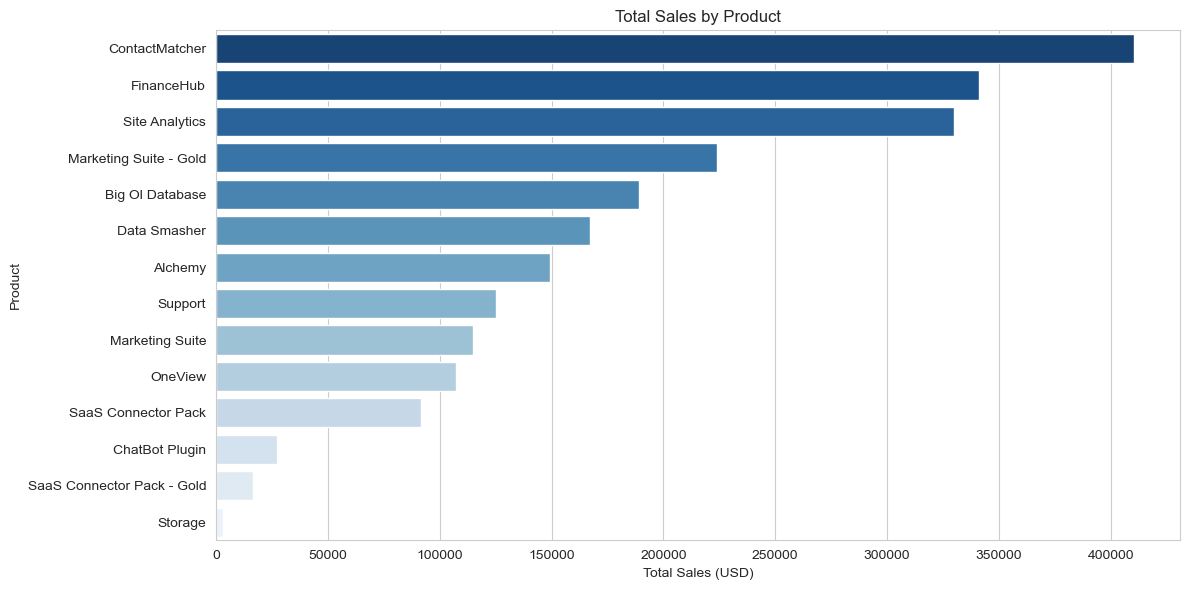

C:\Users\cakra\AppData\Local\Temp\ipykernel_31908\2445864138.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Quantity_Sold', y='Product', data=top_quantity, palette='Greens_r')


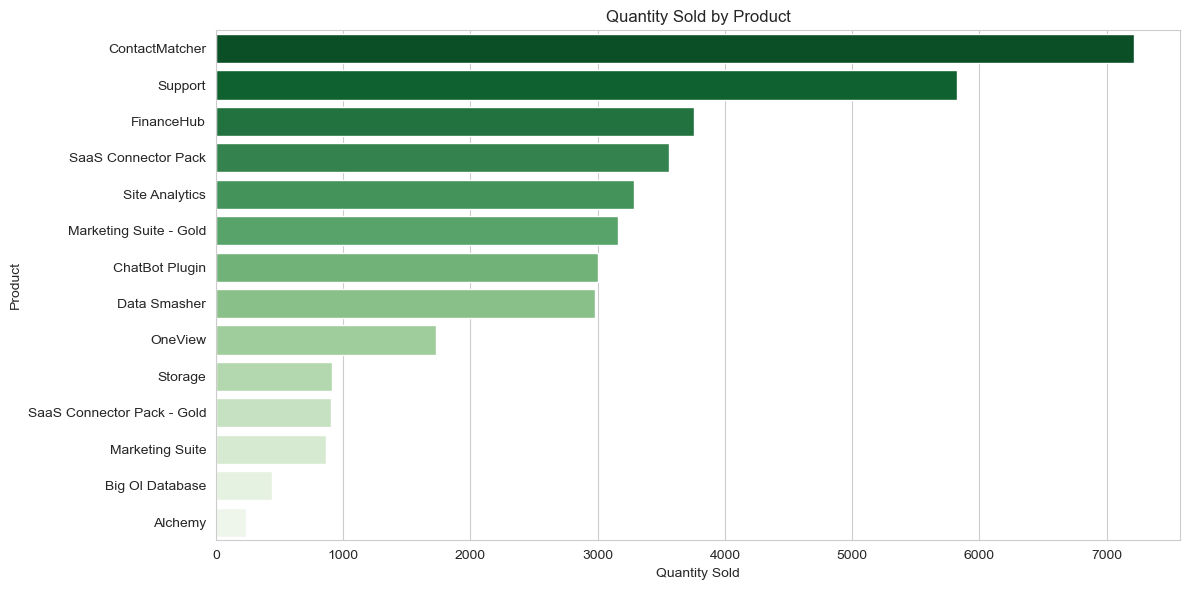

C:\Users\cakra\AppData\Local\Temp\ipykernel_31908\2445864138.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Profit', y='Product', data=top_profit, palette='Purples_r')


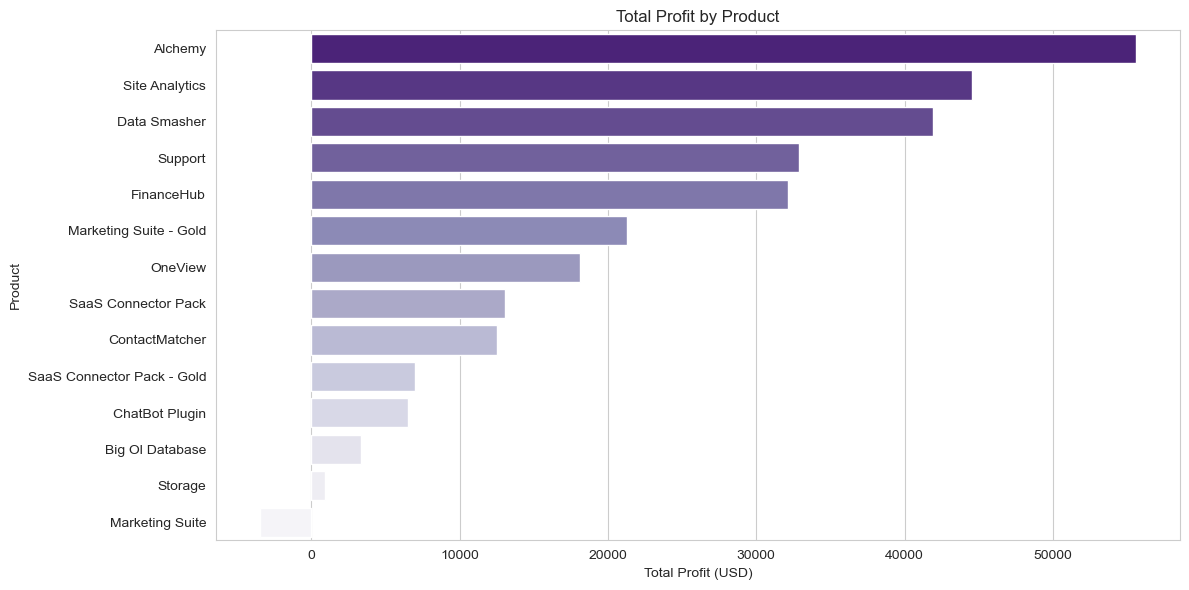

In [62]:
# Top products by Total Sales
plt.figure(figsize=(12,6))
sns.barplot(x='Total_Sales', y='Product', data=top_sales, palette='Blues_r')
plt.title("Total Sales by Product")
plt.xlabel("Total Sales (USD)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# Top products by Quantity Sold
plt.figure(figsize=(12,6))
sns.barplot(x='Quantity_Sold', y='Product', data=top_quantity, palette='Greens_r')
plt.title("Quantity Sold by Product")
plt.xlabel("Quantity Sold")
plt.ylabel("Product")
plt.tight_layout()
plt.show()

# Top products by Total Profit
top_profit = product_perf.sort_values(by='Total_Profit', ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x='Total_Profit', y='Product', data=top_profit, palette='Purples_r')
plt.title("Total Profit by Product")
plt.xlabel("Total Profit (USD)")
plt.ylabel("Product")
plt.tight_layout()
plt.show()


#### Product Performance (Results)

**Top Revenue Products**  
- ContactMatcher (410K)  
- FinanceHub (341K)  
- Site Analytics (330K)  
But profitability is mixed:  
  - ContactMatcher: only 3% margin (12K profit)  
  - FinanceHub: 9% margin (32K profit)  
  - Site Analytics: stronger at 13% margin (45K profit)  

**Top Quantity Sold**  
- ContactMatcher (7,215 units)  
- Support (5,825 units)  
- FinanceHub (3,756 units)  
Support stands out with healthy profit (33K, 26% margin).  
ContactMatcher sells the most but earns very little.  

**Most Profitable Products**  
- Alchemy: 56K profit, 37% margin  
- Site Analytics: 45K profit, 13% margin  
- Data Smasher: 42K profit, 25% margin  

**Key Insights**  
- High sales do **not** always mean high profit.  
- Alchemy, Data Smasher, and Support deliver strong margins despite lower volume.  
- Marketing Suite loses money (–3.5K) even with 115K sales.  

**Conclusion**  
- Focus on **scaling high-margin products** (Alchemy, Data Smasher, Support).  
- **Reassess loss-making products** (Marketing Suite).  
- Manage **ContactMatcher** carefully: it drives volume but contributes very little profit.  


#### Product Performance (Top 3 Summary)

| Rank | By Sales (Revenue)      | By Quantity Sold   | By Profit (Absolute) |
|------|--------------------------|--------------------|-----------------------|
| 1    | ContactMatcher (410K)   | ContactMatcher (7,215) | Alchemy (56K, 37%)   |
| 2    | FinanceHub (341K)       | Support (5,825)       | Site Analytics (45K, 13%) |
| 3    | Site Analytics (330K)   | FinanceHub (3,756)    | Data Smasher (42K, 25%)  |

**Key takeaway:**  
- ContactMatcher dominates in both **sales and units sold**, but is weak in profitability.  
- **Alchemy, Site Analytics, and Data Smasher** are the true profit leaders.  

### C. Pricing Strategy & Hypothesis Testing  

**Objective.**  
Evaluate whether offering a **discount** has a statistically significant impact on **average Profit**.  
Specifically, compare transactions with `Discount = 0` (No Discount) against those with `Discount > 0` (With Discount).  

**Approach.**  
1. Define the two groups:  
   - Group 1: No Discount  
   - Group 2: With Discount  
2. Check statistical assumptions:  
   - Data type (continuous vs categorical)  
   - Distribution normality (Shapiro-Wilk test + visualization)  
3. Choose the appropriate statistical test:  
   - If both groups are approximately normal >>> use Welch’s t-test.  
   - If not normal >>> use non-parametric Mann-Whitney U test.  
4. Formulate hypotheses:  
   - H₀: There is no difference in mean Profit between the two groups.  
   - H₁: There is a difference in mean Profit between the two groups.  
5. Run the statistical test.  


In [63]:
# Groups
no_discount = df[df['Discount'] == 0]['Profit']
with_discount = df[df['Discount'] > 0]['Profit']

# Normality test
shapiro_no = shapiro(no_discount.sample(min(5000, len(no_discount)), random_state=10))
shapiro_with = shapiro(with_discount.sample(min(5000, len(with_discount)), random_state=10))

print("Shapiro-Wilk Test (No Discount):", shapiro_no)
print("Shapiro-Wilk Test (With Discount):", shapiro_with)

# Decide test based on normality
if shapiro_no.pvalue > 0.05 and shapiro_with.pvalue > 0.05:
    print("\nBoth groups ~ normal >>> proceed with Welch's t-test")
    t_stat, p_val = ttest_ind(no_discount, with_discount, equal_var=False)
    print(f"T-statistic: {t_stat:.2f}, P-value: {p_val:.4f}")
else:
    print("\nAt least one group not normal >>> proceed with Mann-Whitney U test")
    u_stat, p_val = mannwhitneyu(no_discount, with_discount, alternative='two-sided')
    print(f"U-statistic: {u_stat:.2f}, P-value: {p_val:.4f}")

Shapiro-Wilk Test (No Discount): ShapiroResult(statistic=0.19346250371966933, pvalue=9.304281517901821e-90)
Shapiro-Wilk Test (With Discount): ShapiroResult(statistic=0.2902884832221839, pvalue=6.628443231869929e-88)

At least one group not normal >>> proceed with Mann-Whitney U test
U-statistic: 18663602.50, P-value: 0.0000


#### Pricing Strategy & Hypothesis Testing: Results  

**Normality Test (Shapiro-Wilk):**  
- No Discount: p-value ≈ 0.0 → reject H₀ → not normal.  
- With Discount: p-value ≈ 0.0 → reject H₀ → not normal.  

Both groups are not normally distributed.  

**Chosen Test:**  
- Used **Mann-Whitney U test** (non-parametric).  

**Results:**  
- U-statistic = 18,663,602.50  
- p-value < 0.0001  

**Interpretation:**  
- Since p-value is far below 0.05, we **reject H₀**.  
- There is a **statistically significant difference** in average profit between transactions with and without discount.  
- Direction of effect (from group means earlier):  
  - No Discount: **+66.9** average profit  
  - With Discount: **–6.7** average profit  

**Conclusion:**  
Discounting has a **negative and significant impact** on profitability.  
Management should set strict discount policies, ensuring discounts are only given when tied to clear strategic goals.  

## 4. Insights & Recommendations  

Based on the analyses conducted in Section 3, several key insights emerge:

1. **Profitability & Segment Analysis**  
   - SMB contributes the highest total profit, but also carries the highest loss ratio.  
   - Strategic and Enterprise segments deliver higher profit margins with relatively lower risk.  
   - Regional comparison shows that profitability varies, with some segment–region pairs performing much better than others.  
   - **Recommendation:** Maintain focus on SMB for revenue, but monitor risks closely. At the same time, invest more in Strategic and Enterprise customers where margins are stronger.

2. **Product Performance**  
   - The top revenue and quantity drivers (e.g., ContactMatcher, FinanceHub) are not the most profitable.  
   - Products such as Alchemy, Data Smasher, and Support generate healthier margins despite lower sales volume.  
   - Marketing Suite shows negative profit despite notable sales.  
   - **Recommendation:** Scale up high-margin products (Alchemy, Data Smasher, Support) and re-evaluate products with weak or negative profitability (e.g., Marketing Suite).  

3. **Pricing Strategy & Hypothesis Testing**  
   - Statistical testing shows a significant difference in average profit between discounted and non-discounted transactions.  
   - Transactions without discounts are profitable on average, while discounted transactions tend to generate lower or even negative profit.  
   - **Recommendation:** Reconsider discounting policies and apply stricter control, as discounting clearly erodes profitability.  

**Overall Recommendation:**  
Focus on balancing **volume (SMB, high-selling products)** with **margin efficiency (Strategic/Enterprise segments, high-profit products)**, while **tightening discount policies** to protect profitability.  


## 5. Conclusion  

This project explored key business questions using the SaaS Sales dataset.  

1. **Profitability & Segment Analysis:**  
   SMB is the largest profit contributor but comes with higher risk, while Strategic and Enterprise segments deliver stronger margins and lower loss ratios.  

2. **Product Performance:**  
   Top-selling products (ContactMatcher, FinanceHub) are not necessarily the most profitable. Alchemy, Data Smasher, and Support stand out as high-margin products, whereas Marketing Suite incurs losses despite notable sales.  

3. **Pricing Strategy & Hypothesis Testing:**  
   Statistical analysis confirms that discounting significantly reduces profitability. Non-discounted transactions generate positive profit, while discounted transactions often result in lower or negative profit.  

**Final Remark:**  
The findings highlight the need to balance growth and profitability by:  
- Leveraging high-volume segments while managing risk.  
- Scaling products with strong margins and reassessing loss-making ones.  
- Exercising caution with discounts, as they directly erode profitability.  

This analysis provides evidence-based insights that can guide strategic decisions in customer management, product focus, and pricing policies.  